# 0.1 Imports

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_1samp, shapiro, ttest_ind, mannwhitneyu, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 0.2 Example 1 - One Sample Test

In [3]:
df = [14, 14, 16, 13, 12, 17, 15, 14, 15, 13, 15, 14]

# Ho: u = 15 (A altura média das espécies das plantas, de fato, é 15 cm) 
# H1: u <> 15 (A altura média das espécies das plantas difere de 15 cm) 

statistic, pvalue = ttest_1samp(df, popmean=15)
print(f'p-value {pvalue}')

alpha = 0.05 # Nível de aleatoriedade
if pvalue < alpha:
    print('Rejeita a hipótese nula') # As espécies são diferentes
else:
    print('Falha em rejeitar a hipótese nula') # Não é posível concluir, 
        # necessário mais dados ou uma diferença de altura maior



p-value 0.12014460742498101
Falha em rejeitar a hipótese nula


# 0.2 Example 2 - Two Sample Test

In [4]:
df1 = np.array([14, 15, 15, 16, 13, 8, 14, 17, 16, 14, 19, 20, 21, 15, 15, 16, 16, 13, 14, 12])
df2 = np.array([15, 17, 14, 17, 14, 8, 12, 19, 19, 14, 17, 22, 24, 16, 13, 16, 13, 18, 15, 13])

# H0: u1 = u2 (A altura média das espécies dos grupos são iguais)
# H1: u <> 15 (A altura média dos grupos são diferentes)

print(np.mean(df1))
print(np.mean(df2))

15.15
15.8


In [5]:
# Condições paramétricas
# 1. Amostras independentes
# 2. Normalmente distribuidos

# Teste de normalidade - Shapiro
# H0: Distribuição Normalmente distribuida
# H1: Distribuição não normal

# if pvalue < alpha: 
#   print('Rejeito a hipótese nula')
#   pvalue = 0.00001 - Digo que é normal
# else:
#   print('Falha em rejeitar a hipótese nula')
#   pvalue = 0.89392 - Não é normal

stats1, pvalue1 = shapiro(df1)
print(f'p-value: {pvalue1}')

stats2, pvalue2 = shapiro(df2)
print(f'p-value: {pvalue2}')

# 2. Variancias iguais - Ok
var1 = np.var(df1)
var2 = np.var(df2)

print(f'\nVar 1: {var1}')
print(f'Var 2: {var2}')

diff_var = var2/var1

if diff_var < 4: # Se a diff da variancia for menor que 4 pode-se dizer que é igual
    var_equal = True
else:
    var_equal = False

stats, pvalue = ttest_ind(df1, df2, equal_var=var_equal)
print(f'\np-value: {pvalue}')

alpha = 0.05
if pvalue < alpha:
    print('Rejeita a hipótese nula') # As espécies são diferentes
else:
    print('Falha em rejeitar a hipótese nula') # Não é posível concluir, 
        # necessário mais dados ou uma diferença de altura maior

p-value: 0.2267739325761795
p-value: 0.6782065033912659

Var 1: 7.727500000000001
Var 2: 12.260000000000002

p-value: 0.5300471010405257
Falha em rejeitar a hipótese nula


# 0.3 Example 3 - Mann-Whitney U-test (Condições paramétricas não satisfeitas)

In [10]:
df1 = [20, 23, 21, 20, 18, 17, 18, 14, 20, 24, 43, 19]
df2 = [24, 25, 21, 22, 23, 18, 17, 28, 24, 27, 21, 23]

# H0: u1 = u2 (A altura média das espécies dos grupos são iguais)
# H1: u <> 15 (A altura média dos grupos são diferentes)

# Condições paramétricas
# 1. Amostras independentes
# 2. Normalmente distribuidos

# Teste de normalidade - Shapiro
# H0: Distribuição Normalmente distribuida
# H1: Distribuição não normal

# if pvalue < alpha: 
#   print('Rejeito a hipótese nula')
#   pvalue = 0.00001 - Digo que é normal
# else:
#   print('Falha em rejeitar a hipótese nula')
#   pvalue = 0.89392 - Não é normal

stats1, pvalue1 = shapiro(df1)
print(f'p-value: {pvalue1}')

stats2, pvalue2 = shapiro(df2)
print(f'p-value: {pvalue2}')

# 2. Variancias iguais - Ok
var1 = np.var(df1)
var2 = np.var(df2)

print(f'\nVar 1: {var1}')
print(f'Var 2: {var2}')

diff_var = var2/var1

if diff_var < 4: # Se a diff da variancia for menor que 4 pode-se dizer que é igual
    var_equal = True
else:
    var_equal = False

stats, pvalue = mannwhitneyu(df1, df2)
print(f'\np-value: {pvalue}')

alpha = 0.05
if pvalue < alpha:
    print('Rejeita a hipótese nula') # As espécies são diferentes
else:
    print('Falha em rejeitar a hipótese nula') # Não é posível concluir, 
        # necessário mais dados ou uma diferença de altura maior

p-value: 0.0005459139938466251
p-value: 0.9021514058113098

Var 1: 48.743055555555564
Var 2: 9.6875

p-value: 0.07217495133598324
Falha em rejeitar a hipótese nula


# 0.4 Example 4 - 

In [14]:
df = pd.DataFrame({'A': [25, 30, 28, 36, 29],
                    'B': [45, 55, 29, 56, 40],
                    'C': [30, 29, 33, 37, 27],
                    'D': [54, 60, 51, 62, 73]})

In [16]:
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])
df_melt.columns = ['index', 'treatment', 'value']
df_melt.head()

,index,treatment,value
0,0,A,25
1,1,A,30
2,2,A,28
3,3,A,36
4,4,A,29


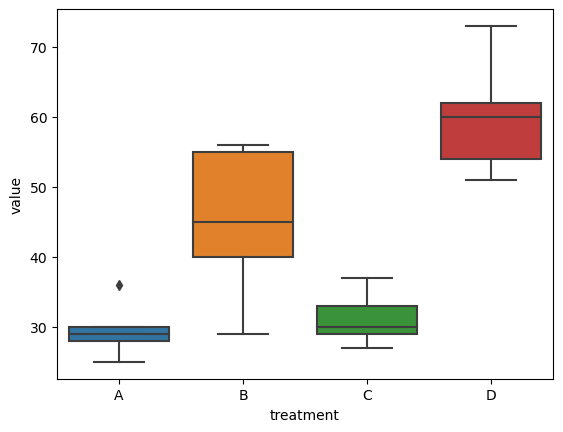

In [20]:
sns.boxplot(x='treatment', y='value', data=df_melt);

In [35]:
stat, p_value_a = shapiro(df['A'])
stat, p_value_b = shapiro(df['B'])
stat, p_value_c = shapiro(df['C'])
stat, p_value_d = shapiro(df['D'])

print(f'p_value - Grupo A: {p_value_a}')
print(f'p_value - Grupo B: {p_value_b}')
print(f'p_value - Grupo C: {p_value_c}')
print(f'p_value - Grupo D: {p_value_d}')

print(f'\nvariance - Grupo A: {np.var(df["A"])}')
print(f'variance - Grupo B: {np.var(df["B"])}')
print(f'variance - Grupo C: {np.var(df["C"])}')
print(f'variance - Grupo D: {np.var(df["D"])}')

p_value - Grupo A: 0.6075581908226013
p_value - Grupo B: 0.5723677277565002
p_value - Grupo C: 0.7583119869232178
p_value - Grupo D: 0.7002365589141846

variance - Grupo A: 13.040000000000001
variance - Grupo B: 100.4
variance - Grupo C: 12.16
variance - Grupo D: 58.0


In [39]:
stats, pvalue = f_oneway(df['A'], df['B'], df['C'], df['D'])
print(f'p-value: {pvalue}')

# Ho: Não há diferença na altura média
# H1: Há diferença na altura média

alpha = 0.05

if pvalue < alpha:
    print('Rejeita a hipótese nula')
else:
    print('Falha em rejeitar a hipótese nula')

p-value: 2.639241146210922e-05
Rejeita a hipótese nula


In [41]:
tukey = pairwise_tukeyhsd(endog=df_melt['value'], groups=df_melt['treatment'], alpha=alpha)

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B     15.4 0.0251   1.694 29.106   True
     A      C      1.6 0.9867 -12.106 15.306  False
     A      D     30.4 0.0001  16.694 44.106   True
     B      C    -13.8 0.0482 -27.506 -0.094   True
     B      D     15.0 0.0296   1.294 28.706   True
     C      D     28.8 0.0001  15.094 42.506   True
---------------------------------------------------
